In [21]:
#import packages
import pandas as pd
import requests
import json
import os.path
from os import path
import csv
import numpy as np
import matplotlib.pyplot as plt
import folium
import ast

In [2]:
#yelp credentials
yelp_id = "4eucNo6rT7PNhkEzgMEKJQ"
yelp_key = "7bG0ESSZL3r562AjGaZ-C2NFWWlOuwXiMJPb_xI0mUiziEKXWS9DVhiM_t4Jk0xdqLHc1qsKtDqdhrPRut4sHlmFac3p0rKuBKm3vUhAW0Vhb33NFzVaAaE7nXOaYHYx"

In [4]:
#data acquisition process
#define yelp call function
def yelp_call(url_params, api_key):
    headers = {'Authorization': 'Bearer ' + api_key}
    response = requests.get('https://api.yelp.com/v3/businesses/search', headers=headers, params=url_params)
    data = response.json()
    return data

In [5]:
#select data from yelp api needed for analysis
all_categories = ['id', 'name', 'is_closed', 'url', 'review_count', 'categories', 
                  'rating', 'latitude', 'longitude', 'address1', 'address2', 
                  'address3', 'city', 'state', 'zip_code', 'price']

In [6]:
#define function to parse yelp data for above categories
def parse_results(results):
    parsed_data=[]
    for business in results['businesses']:
        if 'price' not in business:
            business['price'] = None
        business_data = [business['id'], business['name'], business['is_closed'], business['url'], 
                         business['review_count'], business['categories'], business['rating'], 
                         business['coordinates']['latitude'], business['coordinates']['longitude'], 
                         business['location']['address1'], business['location']['address2'], 
                         business['location']['address3'], business['location']['city'], 
                         business['location']['state'], business['location']['zip_code'], business['price']]
        business_data_zip = dict(zip(all_categories, business_data))
        parsed_data.append(business_data_zip)
    return parsed_data

In [7]:
#define function to save csv file containing yelp info and append additional data
def df_save(csv_filepath, parsed_results):
    parsed_df = pd.DataFrame(parsed_results)
    if path.exists(csv_filepath) == False:
        parsed_df.to_csv(csv_filepath, header=True)
    else:
        with open(csv_filepath, 'a') as f:
            parsed_df.to_csv(f, header=False)

In [8]:
#define parameters for yelp call
url_params = {
    'term': 'restaurant',
    'location': 'Long+Beach+Island+NJ',
    'limit': 50,
    'offset': 0}
api_key = yelp_key

In [10]:
# loop over functions to get data and save as csv
cur = 0
while cur < 250:
    url_params['offset'] = cur
    results = yelp_call(url_params, api_key)
    parsed_results = parse_results(results)
    df_save('yelp_businesses.csv', parsed_results)
    cur += 50

In [13]:
#open csv and begin to look at data
df = pd.read_csv('yelp_businesses.csv')

In [15]:
df.head()

,Unnamed: 0,id,name,is_closed,url,review_count,categories,rating,latitude,longitude,address1,address2,address3,city,state,zip_code,price
0,0,YVERvPBMurED_1yWtigJQw,Salt Kitchen & Bar,False,https://www.yelp.com/biz/salt-kitchen-and-bar-...,72,"[{'alias': 'newamerican', 'title': 'American (...",4.0,39.652724,-74.182748,350 W 8th St,NaN,NaN,Ship Bottom,NJ,8008,NaN
1,1,uMNgVdpOI22QFTkxaVo9sA,The Beach House Restaurant,False,https://www.yelp.com/biz/the-beach-house-resta...,101,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.0,39.585813,-74.223744,13015 Long Beach Blvd,NaN,NaN,Beach Haven Terrace,NJ,8008,$$$
2,2,uBMQXMgvK1iVdmS4CglCKA,Ship Bottom Shellfish,False,https://www.yelp.com/biz/ship-bottom-shellfish...,294,"[{'alias': 'seafood', 'title': 'Seafood'}]",4.0,39.644334,-74.180282,1721 Long Beach Blvd,NaN,NaN,Ship Bottom,NJ,8008,$$
3,3,QKhSd92X3EF8fComzbA45w,The Chicken or the Egg,False,https://www.yelp.com/biz/the-chicken-or-the-eg...,912,"[{'alias': 'tradamerican', 'title': 'American ...",4.5,39.564671,-74.238966,207 N Bay Ave,NaN,NaN,Beach Haven,NJ,8008,$$
4,4,fstH18hKRdg5LLtocV8G_A,The Arlington,False,https://www.yelp.com/biz/the-arlington-ship-bo...,344,"[{'alias': 'newamerican', 'title': 'American (...",3.5,39.646470,-74.177979,1302 Long Beach Blvd,NaN,NaN,Ship Bottom,NJ,8008,$$$


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    200 non-null    int64  
 1   id            200 non-null    object 
 2   name          200 non-null    object 
 3   is_closed     200 non-null    bool   
 4   url           200 non-null    object 
 5   review_count  200 non-null    int64  
 6   categories    200 non-null    object 
 7   rating        200 non-null    float64
 8   latitude      200 non-null    float64
 9   longitude     200 non-null    float64
 10  address1      199 non-null    object 
 11  address2      7 non-null      object 
 12  address3      4 non-null      object 
 13  city          200 non-null    object 
 14  state         200 non-null    object 
 15  zip_code      200 non-null    int64  
 16  price         151 non-null    object 
dtypes: bool(1), float64(3), int64(3), object(10)
memory usage: 25.3+ KB


In [19]:
#display restaurants on map
locationlist = df[['latitude', 'longitude']].values.tolist()
map = folium.Map(location = [39.7, -74.2])
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df['name'][point]).add_to(map)
map

In [22]:
#create a new dataframe containing the type of restaurants (category)
output = []
for num, restaurant in enumerate(df['categories']):
    for category in ast.literal_eval(restaurant):
        temp_list = [df['id'][num], category['alias'], category['title'], df['rating'][num], df['review_count'][num]]
        output.append(temp_list)
        
category_df = pd.DataFrame(output)

category_df.rename(columns = {0:'business_id', 1:'alias', 2:'title', 3: 'rating', 4: 'review_count'}, inplace = True)

category_df

,business_id,alias,title,rating,review_count
0,YVERvPBMurED_1yWtigJQw,newamerican,American (New),4.0,72
1,YVERvPBMurED_1yWtigJQw,bars,Bars,4.0,72
2,YVERvPBMurED_1yWtigJQw,seafood,Seafood,4.0,72
3,uMNgVdpOI22QFTkxaVo9sA,seafood,Seafood,4.0,101
4,uMNgVdpOI22QFTkxaVo9sA,tradamerican,American (Traditional),4.0,101
...,...,...,...,...,...
427,GaPMgtqB7VOtTy_22IVaPA,pretzels,Pretzels,2.5,7
428,GaPMgtqB7VOtTy_22IVaPA,hotdog,Hot Dogs,2.5,7
429,zdDGGZlW937ACVmbedGrBA,chinese,Chinese,2.0,22
430,78UO-Qgt-Ja0RFIRHWxPDg,delis,Delis,1.0,1


In [27]:
#Find list of restaurant types and count
print('There are ',len(set(category_df['title'])),' restaurant categories:',
      set(category_df['title'])

)

There are  70  restaurant categories: {'Vegetarian', 'American (New)', 'Beer Bar', 'Bars', 'Caribbean', 'Delis', 'Mexican', 'Seafood', 'Noodles', 'Italian', 'Vegan', 'Salad', 'Latin American', 'Creperies', 'Barbeque', 'Tapas Bars', 'Cafes', 'Art Galleries', 'Grocery', 'Cheesesteaks', 'Restaurants', 'Chinese', 'Cocktail Bars', 'Seafood Markets', 'Gastropubs', 'Kebab', 'Hawaiian', 'Pubs', 'Soup', 'Sports Bars', 'Tiki Bars', 'Steakhouses', 'Asian Fusion', 'Pizza', 'Breakfast & Brunch', 'Chicken Shop', 'Beer Gardens', 'Diners', 'Hot Dogs', 'Bubble Tea', 'Chicken Wings', 'French', 'Resorts', 'Fast Food', 'Wraps', 'Mediterranean', 'Caterers', 'Waffles', 'Donuts', 'Food Trucks', 'Coffee & Tea', 'Burgers', 'Butcher', 'Juice Bars & Smoothies', 'Bed & Breakfast', 'Empanadas', 'Sushi Bars', 'Poke', 'Bagels', 'Tex-Mex', 'Pretzels', 'Japanese', 'Desserts', 'Beer, Wine & Spirits', 'Venues & Event Spaces', 'Lounges', 'Ice Cream & Frozen Yogurt', 'Sandwiches', 'American (Traditional)', 'Bakeries'}


In [79]:
#Find top categories by number of restaurants
count_df = category_df.groupby('title').count()['business_id']
count_df = count_df.reset_index()
count_df.rename(columns = {'title':'restaurant_category','business_id': 'restaurant_count'}, inplace = True)
top_categories_df = count_df.sort_values('restaurant_count', ascending=False)[0:23]
top_categories = top_categories_df.reset_index()
top_categories.drop('index', axis=1, inplace = True)

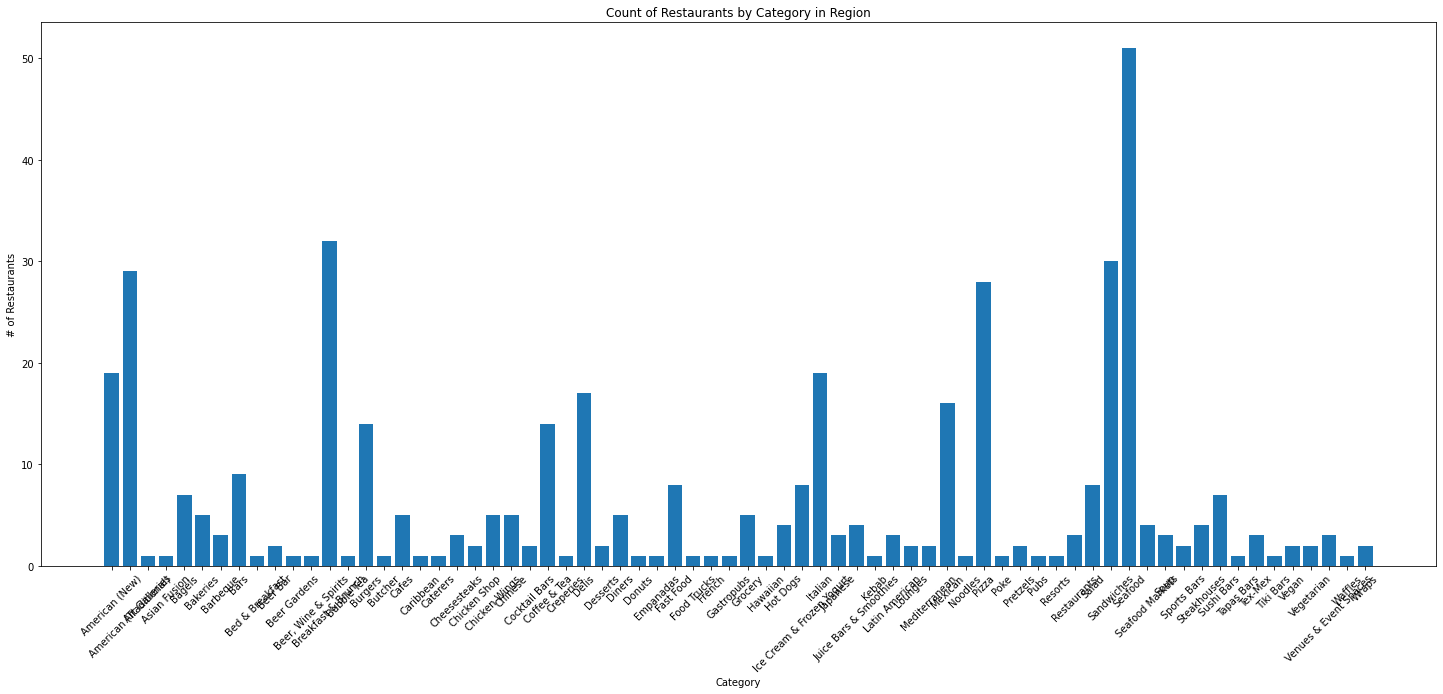

In [80]:
figure, ax = plt.subplots(figsize=(25,10))
ax.bar(count_df['restaurant_category'], count_df['restaurant_count'])
ax.set_xlabel('Category')
ax.set_ylabel('# of Restaurants')
ax.set_title('Count of Restaurants by Category in Region')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

In [81]:
top_categories

,restaurant_category,restaurant_count
0,Seafood,51
1,Breakfast & Brunch,32
2,Sandwiches,30
3,American (Traditional),29
4,Pizza,28
5,American (New),19
6,Italian,19
7,Delis,17
8,Mexican,16
9,Burgers,14


In [82]:
#Find average rating and number of reviews by restaurant type
top_category_list = list(top_categories['restaurant_category'])
average_df = average_df = category_df.groupby('title').mean()
average_df.reset_index(inplace = True)
top_average_df = average_df.loc[average_df['title'].isin(top_category_list)]
top_average_df.reset_index(inplace = True)
top_average_df = top_average_df.drop('index', axis=1)

In [83]:
top_average_df

,title,rating,review_count
0,American (New),3.842105,110.052632
1,American (Traditional),3.568966,124.724138
2,Bagels,3.714286,62.571429
3,Bakeries,2.900000,14.000000
4,Bars,3.388889,156.333333
5,Breakfast & Brunch,3.734375,96.843750
6,Burgers,3.642857,130.714286
7,Cafes,4.000000,8.000000
8,Chicken Wings,3.200000,49.200000
9,Chinese,3.200000,27.400000


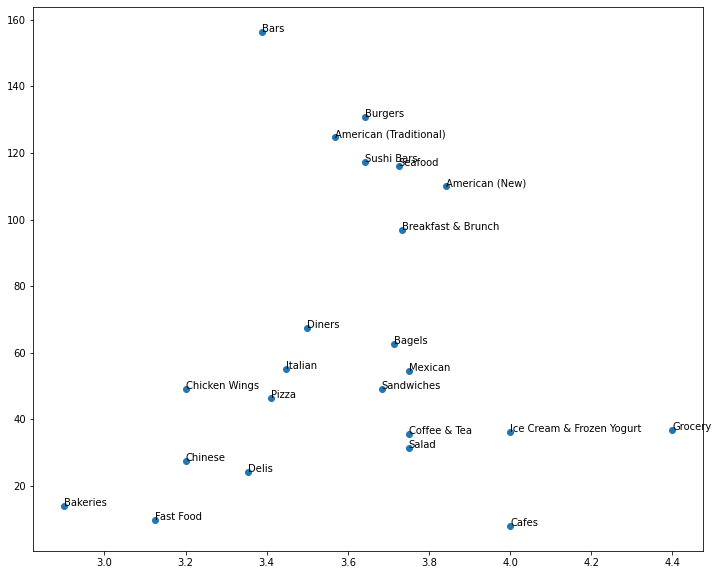

In [84]:
figure, ax = plt.subplots(figsize=(12,10))
ax.scatter(top_average_df['rating'], top_average_df['review_count'])
for i, label in enumerate(top_average_df['title']):
    plt.annotate(label, (top_average_df['rating'][i], top_average_df['review_count'][i]))

In [87]:
#Identify areas to open a restaurant in LBI region
mainland_towns = ['Barnegat', 'Eagleswood', 'Little Egg Harbor Twp', 'Manahawkin', 'Stafford Township', 'West Creek']
area = []
for num, city in enumerate(df['city']):
    if city in mainland_towns:
        area.append('mainland')
    elif df['latitude'][num] > 39.6:
        area.append('island-north')
    else:
        area.append('island-south')

In [88]:
#Add area to dataframe
df['area'] = area

In [89]:
#Number of restaurants in each area
df.groupby('area').count()['id']

area
island-north    65
island-south    68
mainland        67
Name: id, dtype: int64